# __Adam Optimizer__
- Adam is an optimization algorithm that combines the benefits of AdaGrad and RMSProp.
- It adapts the learning rates based on both the average first moment (mean) and the average second moment (uncentered variance) of the gradients.
- It uses exponential moving averages of the gradients and squared gradients, controlled by parameters beta1 and beta2, to update the model parameters effectively.

## Steps to be followed:
1. Import the required libraries
2. Define the objective function
3. Implement Adam algorithm
4. Plot the objective function
5. Optimize the Adam

### Step 1: Import the Required Libraries

- Import NumPy packages
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size
- Import all other necessary libraries

In [1]:
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
import numpy as np

### Step 2: Define the Objective Function
- The objective function is a mathematical function that takes two variables, x and y, as inputs.
- It returns the sum of the squares of x and y, representing a measure of the quality or fitness of a particular solution in an optimization problem.

In [2]:
def objective (w,b) :
    return w** 2.0 + b**2.0

Define the Derivative of the Objective Function
- The derivative of the objective function is defined as an array containing the partial derivatives with respect to x and y, calculated as **[x * 2.0, y * 2.0]**.

In [3]:
def derivative(w, b):
    return np.array([2.0 * w, 2.0 * b])

### How does Adam algorithm work?
- Select a random point in the bounds of the problem as a starting point for the search
- Generate an initial point
  - x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  - score = objective(x[0], x[1])
- Initialize first and second moments
  - m = [0.0 for _ in range(bounds.shape[0])]
  - v = [0.0 for _ in range(bounds.shape[0])]
- Run  fixed number of iterations of gradient descent
- Calculate gradient
   - gradient = derivative(solution[0], solution[1])
- Calculate gradient g(t)
- Derivative of the current set of parameters
   - g(t) = derivative(x[0], x[1])
- First moment
  - m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
  - m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
- Second moment
   - v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
   - v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
- Bias correction
  - mhat(t) = m(t) / (1 - beta1(t))
  - mhat = m[i] / (1.0 - beta1**(t+1))
  - vhat(t) = v(t) / (1 - beta2(t))
  - vhat = v[i] / (1.0 - beta2**(t+1))
- The updated variable
  - x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
  - x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
- This is repeated for each parameter that is being optimized.


### Step 3: Implement Adam Algorithm
 - The code defines a gradient descent algorithm with the Adam optimization method.
 - It takes an objective function, derivative function, bounds of the variables, number of iterations, learning rate (alpha), and Adam parameters (beta1 and beta2) as inputs.
 - The algorithm iteratively updates the solution by calculating gradients, updating first and second moments, and adjusting the solution using the Adam update equation.
 - The progress is reported at each iteration, and the final solution along with its corresponding score is returned.
 - This code implements gradient descent with Adam optimization for finding the best solution to the provided objective function within the given bounds.

In [4]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):

    solutions = []

    # Initialize parameters weight w and bias b
    param = np.array([-.75,-.9])

    # Initialize exponential average of the gradients
    v = derivative(param[0],param[1])

    # Initialize exponential average of the square of the gradients
    s = derivative(param[0],param[1])**2

    for t in range(n_iter):

        # Compute gradient
        g = derivative(param[0],param[1])

        # Update momentum term (exp. M.A. of gradient)
        v = beta1 * v + (1-beta1) * g

        # Update RMSprop term: (exp. M.A. of squares of the gradient)
        s = beta2 * s + (1-beta2) * g**2

        # Re-scale v and s
        v_tilde = v / (1.0 - beta1**(t+1))
        s_tilde = s / (1.0 - beta2**(t+1))

        # Update parameters
        param = param - alpha * v_tilde / (np.sqrt(s_tilde) + eps)

        # Optionally,
        score = objective(param[0], param[1])
        print('>%d f(%s) = %.5f' % (t, param, score))
        solutions.append(list(param))

    return [param, score,solutions]

### Step 4: Plotting the Objective Function

- The code defines the range of input values using the "bounds" array and creates two arrays, "x-axis" and "y-axis," with uniformly spaced values at 0.1 increments within the defined range.
- It then generates a mesh grid of coordinates using the "x-axis" and "y-axis" arrays, computes the objective function values for each coordinate, and creates a filled contour plot with 50 levels using the "contour" function in Matplotlib with the jet color scheme.

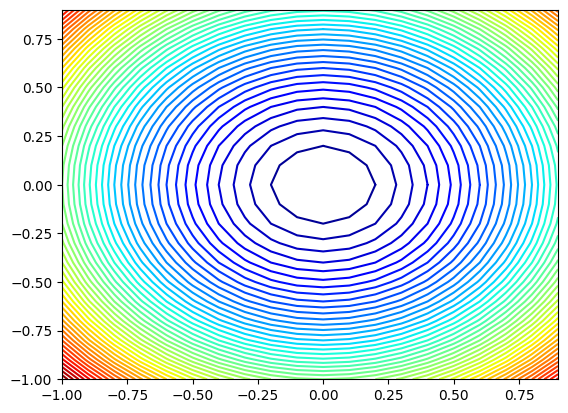

In [5]:
bounds = asarray([[-1.0, 1.0],[-1.0, 1.0]])

xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

x, y = meshgrid (xaxis, yaxis)

results = objective(x,y)

pyplot.contour(x, y, results, levels = 50,cmap = 'jet')

pyplot.show()

**Observation:**
- The code generates a contour plot of the objective function using the given input range.
- The contour plot provides a visual representation of the function's values and their variations across the input space.

Note: The initial value of the moving averages and beta1 and beta2 values close to 1.0 (recommended) result in a bias of moment estimates toward zero.
This bias is overcome by first calculating the biased estimate before calculating the bias-corrected estimates.

## Step 5: Optimizing the Adam
- Set the random seed to ensure reproducibility
- Define the bounds for the input variables
- Specify the number of iterations
- Set the value of alpha, beta1, and beta2 for the Adam algorithm
- Apply the Adam algorithm to find the best solution and its corresponding score
- Print messages indicating the completion of the optimization process




In [6]:
seed(1)
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 250
alpha = 0.1
beta1 = 0.8
beta2 = 0.999

best, score, solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.73418861 -0.88418861]) = 1.32082
>1 f([-0.72182123 -0.87181254]) = 1.28108
>2 f([-0.71072451 -0.8606956 ]) = 1.24593
>3 f([-0.70022442 -0.85016155]) = 1.21309
>4 f([-0.69001647 -0.83990397]) = 1.18156
>5 f([-0.6799369  -0.82975727]) = 1.15081
>6 f([-0.66988896 -0.81962288]) = 1.12053
>7 f([-0.65981253 -0.80943895]) = 1.09054
>8 f([-0.64966971 -0.79916582]) = 1.06074
>9 f([-0.63943699 -0.78877828]) = 1.03105
>10 f([-0.62910076 -0.77826103]) = 1.00146
>11 f([-0.61865447 -0.7676059 ]) = 0.97195
>12 f([-0.60809679 -0.75680992]) = 0.94254
>13 f([-0.59743027 -0.74587412]) = 0.91325
>14 f([-0.5866604 -0.7348025]) = 0.88411
>15 f([-0.57579494 -0.72360138]) = 0.85514
>16 f([-0.56484329 -0.71227885]) = 0.82639
>17 f([-0.55381615 -0.70084432]) = 0.79790
>18 f([-0.54272509 -0.68930822]) = 0.76970
>19 f([-0.53158232 -0.67768168]) = 0.74183
>20 f([-0.52040045 -0.66597632]) = 0.71434
>21 f([-0.50919226 -0.65420407]) = 0.68726
>22 f([-0.49797061 -0.64237702]) = 0.66062
>23 f([-0.48674827 -0.6

**Observation:**
- The observation is that the optimization process using the Adam algorithm successfully converges to a minimal value of the objective function, reaching an optimal solution within the specified bounds.

In [7]:
best

array([ 1.67588409e-08, -1.45059924e-06])

__The trained (optimum) parameters are w=1.67588409e-08 and b=-1.45059924e-06.__

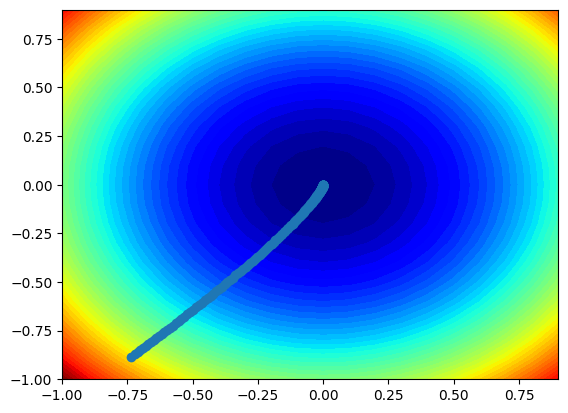

In [8]:
import matplotlib.pyplot as plt

bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

x, y = meshgrid(xaxis, yaxis)

results = objective(x, y)


solarray = np.array(solutions)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
plt.scatter(x = solarray[:,0],y=solarray[:,1])

pyplot.show()